In [4]:
import json
import boto3

import math

def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

def calculate_distance(v1, v2):
    distance = math.dist(v1, v2)
    return distance

def search(dataset, v):
    for item in dataset:
        item['distance'] = calculate_distance(item['embedding'], v)
    dataset.sort(key=lambda x: x['distance'])
    return dataset[0]['text']
    
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
# the data set
t1 = """
The theory of general relativity says that the observed gravitational effect between masses results from their warping of spacetime. 
"""
t2 = """
Quantum mechanics allows the calculation of properties and behaviour of physical systems. It is typically applied to microscopic systems: molecules, atoms and sub-atomic particles. 
"""
t3 = """
Wavelet theory is essentially the continuous-time theory that corresponds to dyadic subband transforms — i.e., those where the L (LL) subband is recursively split over and over.
"""
t4 = """
Every particle attracts every other particle in the universe with a force that is proportional to the product of their masses and inversely proportional to the square of the distance between their centers.
"""
t5 = """
The electromagnetic spectrum is the range of frequencies (the spectrum) of electromagnetic radiation and their respective wavelengths and photon energies. 
"""
dataset = [
    {'text': t1, 'embedding': get_embedding(bedrock, t1)}, 
    {'text': t2, 'embedding': get_embedding(bedrock, t2)}, 
    {'text': t3, 'embedding': get_embedding(bedrock, t3)}, 
    {'text': t4, 'embedding': get_embedding(bedrock, t4)}, 
    {'text': t5, 'embedding': get_embedding(bedrock, t5)}
]
# perform a search for Albert Einstein
query = 'Isaac Newton'
v = get_embedding(bedrock, query)              
result = search(dataset, v)
print(result)



Every particle attracts every other particle in the universe with a force that is proportional to the product of their masses and inversely proportional to the square of the distance between their centers.



In [5]:
def classify(classes, v):
    for item in classes:
        item['distance'] = calculate_distance(item['embedding'], v)
    classes.sort(key=lambda x: x['distance'])
    return classes[0]['name']
    
# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
# the data set
classes = [    
    {'name': 'athletics', 'description': 'all students with a talent in sports'}, 
    {'name': 'musician', 'description': 'all students with a talent in music'}, 
    {'name': 'magician', 'description': 'all students with a talent in witch craft'}
]
for item in classes:
    item['embedding'] = get_embedding(bedrock, item['description'])
# perform a classification
query = 'Ellison sends a spell to prevent Professor Wang from entering the classroom'
v = get_embedding(bedrock, query)              
result = classify(classes, v)
print(result)


magician


In [9]:
import json
import boto3
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


def get_embedding(bedrock, text):
    modelId = 'amazon.titan-embed-text-v1'
    accept = 'application/json'
    contentType = 'application/json'
    input = {
            'inputText': text
        }
    body=json.dumps(input)
    response = bedrock.invoke_model(
        body=body, modelId=modelId, accept=accept,contentType=contentType)
    response_body = json.loads(response.get('body').read())
    embedding = response_body['embedding']
    return embedding

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
names = ['Albert Einstein', 'Bob Dylan', 'Elvis Presley', 
         'Isaac Newton', 'Michael Jackson', 'Niels Bohr', 
         'Taylor Swift', 'Hank Williams', 'Werner Heisenberg', 
         'Stevie Wonder', 'Marie Curie', 'Ernest Rutherford']
embeddings = []
for name in names:
    embeddings.append(get_embedding(bedrock, name))
# clustering
df = pd.DataFrame(data={'names': names, 'embeddings': embeddings})
matrix = np.vstack(df.embeddings.values)
n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(matrix)
df['cluster'] = kmeans.labels_
# result
print(df[['cluster', 'names']])


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f99181f0820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f99181f0820>
Traceb

    cluster              names
0         1    Albert Einstein
1         0          Bob Dylan
2         0      Elvis Presley
3         1       Isaac Newton
4         0    Michael Jackson
5         1         Niels Bohr
6         0       Taylor Swift
7         0      Hank Williams
8         1  Werner Heisenberg
9         0      Stevie Wonder
10        1        Marie Curie
11        1  Ernest Rutherford


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9901bdfa30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


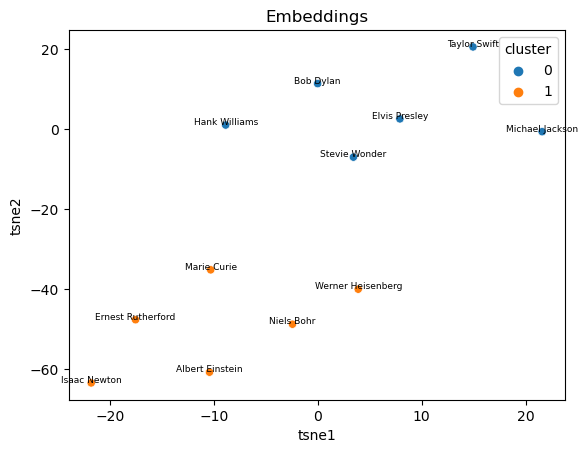

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce number of dimensions from 1536 to 2
tsne = TSNE(random_state=0, n_iter=1000, perplexity=6)
tsne_results = tsne.fit_transform(np.array(df['embeddings'].to_list(), dtype=np.float32))
# Add the results to dataframe as a new column
df['tsne1'] = tsne_results[:, 0]
df['tsne2'] = tsne_results[:, 1]

# Plot the data and annotate the result
fig, ax = plt.subplots()
ax.set_title('Embeddings')
sns.scatterplot(data=df, x='tsne1', y='tsne2', hue='cluster', ax=ax)
for idx, row in df.iterrows():
    ax.text(row['tsne1'], row['tsne2'], row['names'], fontsize=6.5, horizontalalignment='center')

plt.show()
